In [2]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import datetime


from pandas import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py
from plotly.offline import iplot
import plotly.express as px 
import cufflinks as cf

py.offline.init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_columns',21)

C:\Users\JESAL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [3]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split


In [4]:
df=pd.read_csv('price.csv')

In [5]:
df.shape
#rows:2000
#columns:21

(2000, 21)

In [6]:
df.info()
#all the features are numerical type foat64 and int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
detail=["Total energy a battery can store in one time measured in mAh",'Has bluetooth or not 0:hasn"t bluetooth,1:has bluetooth',
       "speed at which microprocessor executes instructions","Has dual sim support or not","Front Camera mega pixels","Has 4G or not",
       "Internal Memory in Gigabytes","Mobile Depth in cm","Weight of mobile phone","no of cores","Primary Camera mega pixels","Pixel Resolution Height",
       "Pixel Resolution Width","Random Access Memory in Megabytes","Screen Height of mobile in cm","Screen Width of mobile in cm","longest time that a single battery charge will last when you are","Has 3G or not",
       "Has touch screen or not","Has wifi or not","Price range 1 ;2; 3"]

In [11]:
for i  in range(len(detail)):
    print(df.columns[i],"------------------------->",detail[i])

battery_power -------------------------> Total energy a battery can store in one time measured in mAh
blue -------------------------> Has bluetooth or not 0:hasn"t bluetooth,1:has bluetooth
clock_speed -------------------------> speed at which microprocessor executes instructions
dual_sim -------------------------> Has dual sim support or not
fc -------------------------> Front Camera mega pixels
four_g -------------------------> Has 4G or not
int_memory -------------------------> Internal Memory in Gigabytes
m_dep -------------------------> Mobile Depth in cm
mobile_wt -------------------------> Weight of mobile phone
n_cores -------------------------> no of cores
pc -------------------------> Primary Camera mega pixels
px_height -------------------------> Pixel Resolution Height
px_width -------------------------> Pixel Resolution Width
ram -------------------------> Random Access Memory in Megabytes
sc_h -------------------------> Screen Height of mobile in cm
sc_w -----------------

## Analysis of  Binary features 


In [12]:
df['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

In [13]:
temp=[]
bin_features=['blue','dual_sim','four_g','three_g',"wifi","touch_screen"]

In [14]:
blue=df['blue'].value_counts()
dual_sim=df['dual_sim'].value_counts()
four_g=df['four_g'].value_counts()
three_g=df['three_g'].value_counts()
wifi=df['wifi'].value_counts()
touch_screen=df['touch_screen'].value_counts()

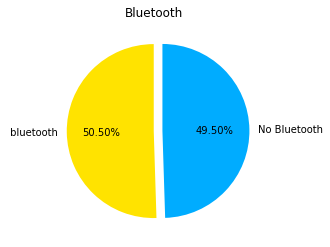

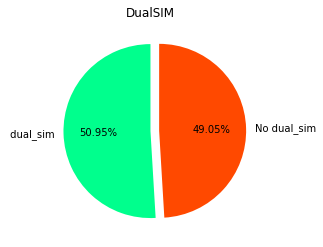

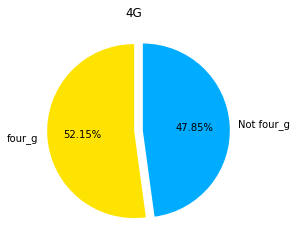

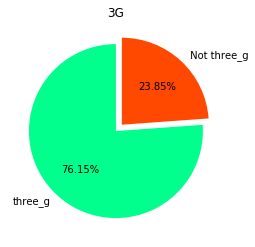

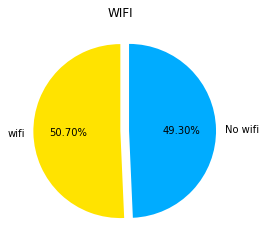

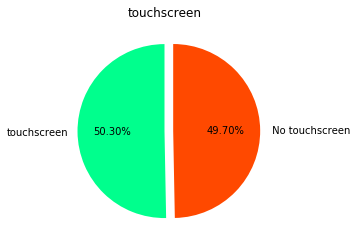

In [15]:
plt.figure(0)
labels = ' bluetooth','No Bluetooth'
sections = blue
colors = ['#FFE300', '#00ACFF']
plt.title('Bluetooth')

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')


plt.figure(1)
labels = ' dual_sim','No dual_sim'
sections = dual_sim
colors = ['#00FF8D', '#FF4900']
plt.title('DualSIM')
plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')
plt.figure(2)
labels = 'four_g','Not four_g'
sections = four_g
colors = ['#FFE300', '#00ACFF']
plt.title('4G')
plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.figure(3)
labels='three_g',' Not three_g'
sections=three_g
plt.title('3G')
colors=['#00FF8D', '#FF4900']
plt.pie(sections,labels=labels,colors=colors,startangle=90,explode=(0,0.1),autopct='%1.2f%%')

plt.figure(4)
labels = 'wifi','No wifi'
sections = wifi
colors = ['#FFE300', '#00ACFF']
plt.title('WIFI')
plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1),
        autopct = '%1.2f%%')

plt.figure(5)
labels='touchscreen',' No touchscreen'
sections=touch_screen
plt.title('touchscreen')
colors=['#00FF8D', '#FF4900']
plt.pie(sections,labels=labels,colors=colors,startangle=90,explode=(0,0.1),autopct='%1.2f%%')


        
plt.show()


- avaibility of 4G,bluetooth and dual sim ,wifi,touchscreen are 50%-50%
- majority people use 3G cell. -->>76.15%

# Binanry Features Vs target features

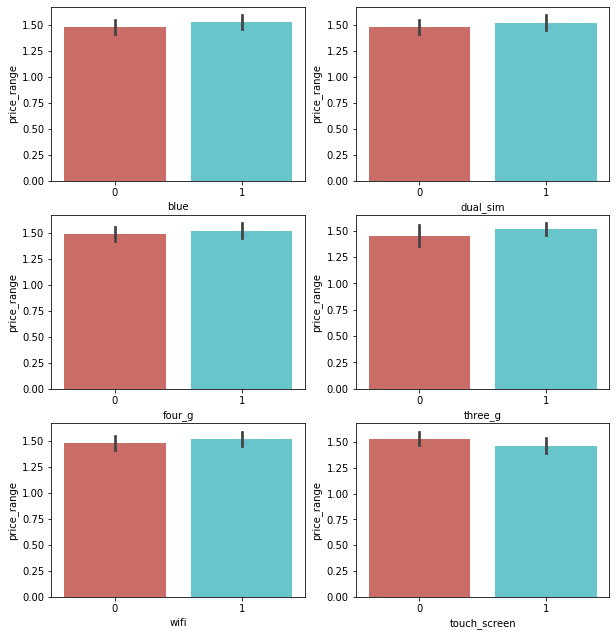

In [20]:
plt.figure(figsize=(10,30))
j=0
for i in bin_features:
    j +=1
    plt.subplot(8,2,j)
    sb.barplot(x=df[i],y=df['price_range'],palette="hls")
    
plt.show()

- almost every binary features ,price range is equal.


## number of cores

In [26]:
n_core=df['n_cores'].value_counts()
n_core

4    274
7    259
8    256
2    247
5    246
3    246
1    242
6    230
Name: n_cores, dtype: int64

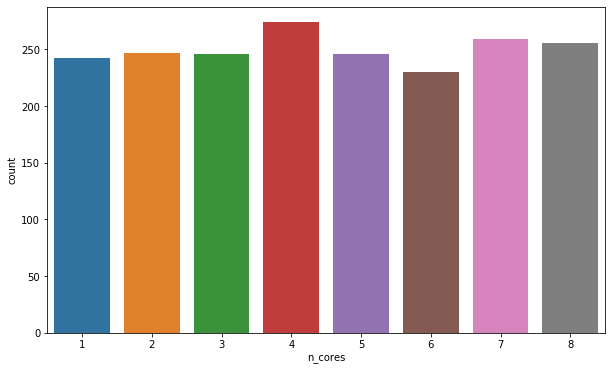

In [32]:
plt.figure(figsize=(10,6))
sb.countplot(df['n_cores'])

- 250+ cellphones have 4 # of cores

##  n_cores Vs price Range

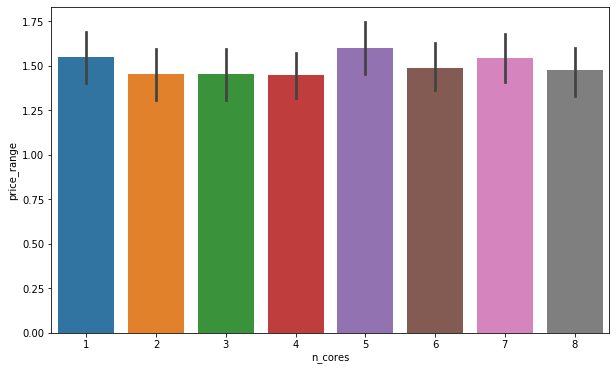

In [33]:
plt.figure(figsize=(10,6))
sb.barplot(df['n_cores'],df['price_range'])

- price range of 5 cores cellphone is highest 

## battery_power

In [45]:
max(df['battery_power'])

1998

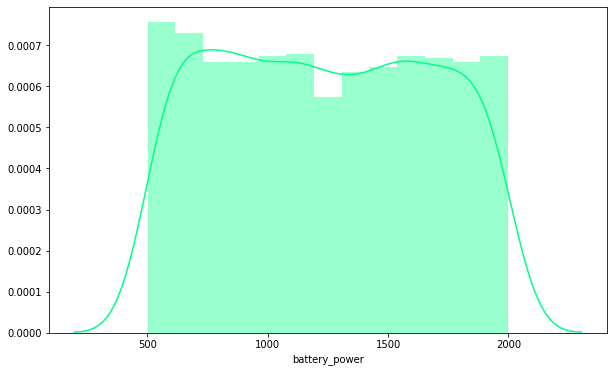

In [42]:
plt.figure(figsize=(10,6))
sb.distplot(df['battery_power'],color='#00FF86')

## battery_power  vs price_range

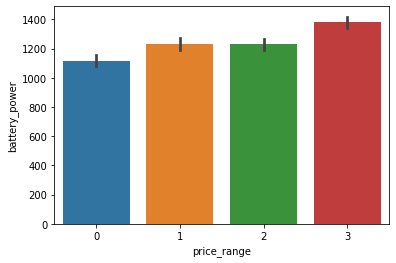

In [48]:
sb.barplot(df['price_range'],df['battery_power'])

#price_range 1 & 2 has same same mH of battery
#highest price_range cellphone has battery power above 1200mH


## clock-speed Vs price_range


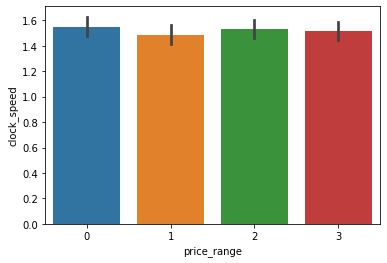

In [53]:
sb.barplot(df['price_range'],df['clock_speed'])

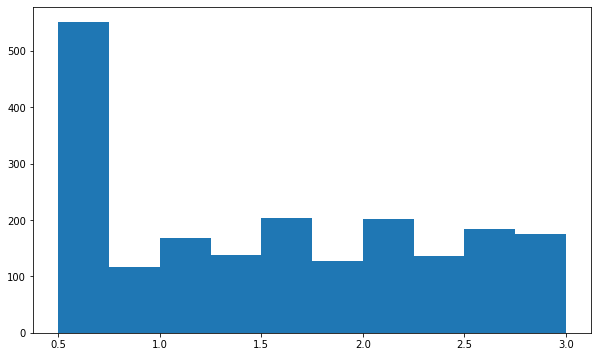

In [59]:
plt.figure(figsize=(10,6))
plt.hist(df['clock_speed'])
plt.show()



- clock range is between 0.5 to 3.
- majority cellphone has clock-speed is 0.5-0.75
